### STL info. to .npy files

 - STL file로부터 저장해둔 정보는 아래와 같음
 
 > 1. STL을 구성하고 있는 points들
 >
 > 2. 1개의 vertex를 이루는 3개의 points 집합 
 >
 > 3. 3개의 points가 이루는 vertex의 normal vector
 >
 > 4. 3개의 points가 이루는 vertex를 포함하는 평면 (plane)
 
 - 이를 다시 읽어서 변수에 저장
 
 - 이때 변수의 type은 np.array

In [179]:
import numpy as np

# 다시 읽어드리기
each_point_data = np.load('data/femur_each_point_data.npy')

vertex_data = np.load('data/femur_vertex_data.npy')
plane_data = np.load('data/femur_plane_data.npy')
vector_data = np.load('data/femur_vector_data.npy')

### error를 더한 points들을 생성하기

 - 여러 error들을 더하여 simulation을 위한 point를 생성
 
 - error를 더해가는 순서는 아래와 같음
 
 > 1. 먼저 commercial tool을 사용하여 40 points를 추려내기
 >
 > 2. 40 points 중 하나를 선택 -> 이 point를 포함하는 vertex들을 찾기 -> 이 vertex 중 하나를 선택 -> 이 선택된 vertex를 포함하는 plane 선택 -> 이 plane 위의 점인 처음 선택한 point에서 20 mm 내의 error가 추가된 point를 생성
 >
 > 3. 2.에서 생성된 point에서 가장 가까운 점을 each point data 중에서 찾기
 >
 > 4. 이는 3D model 표면상의 point -> 이 point을 포함하는 vertex들을 찾기 -> 이 중 하나를 선택 -> 선택된 vertex의 normal vector 방향으로 0.5 mm 정도의 error를 추가한 point를 생성
 
 - 위와 같은 방식의 에러에서 1.은 registration algorithm에서 사용되는 점을 선택하는 작업이며 2.는 사람이 그 점을 선택하지 못하는 error를 추가하는 작업이며 3.은 2.의 연장선 작업이며 4.는 soft tissue 또는 CT segmentation error 그리고 OTS error를 추가한 값

###### select 40 points

 - cloudcompare라는 commercial software를 사용하여 point를 획득

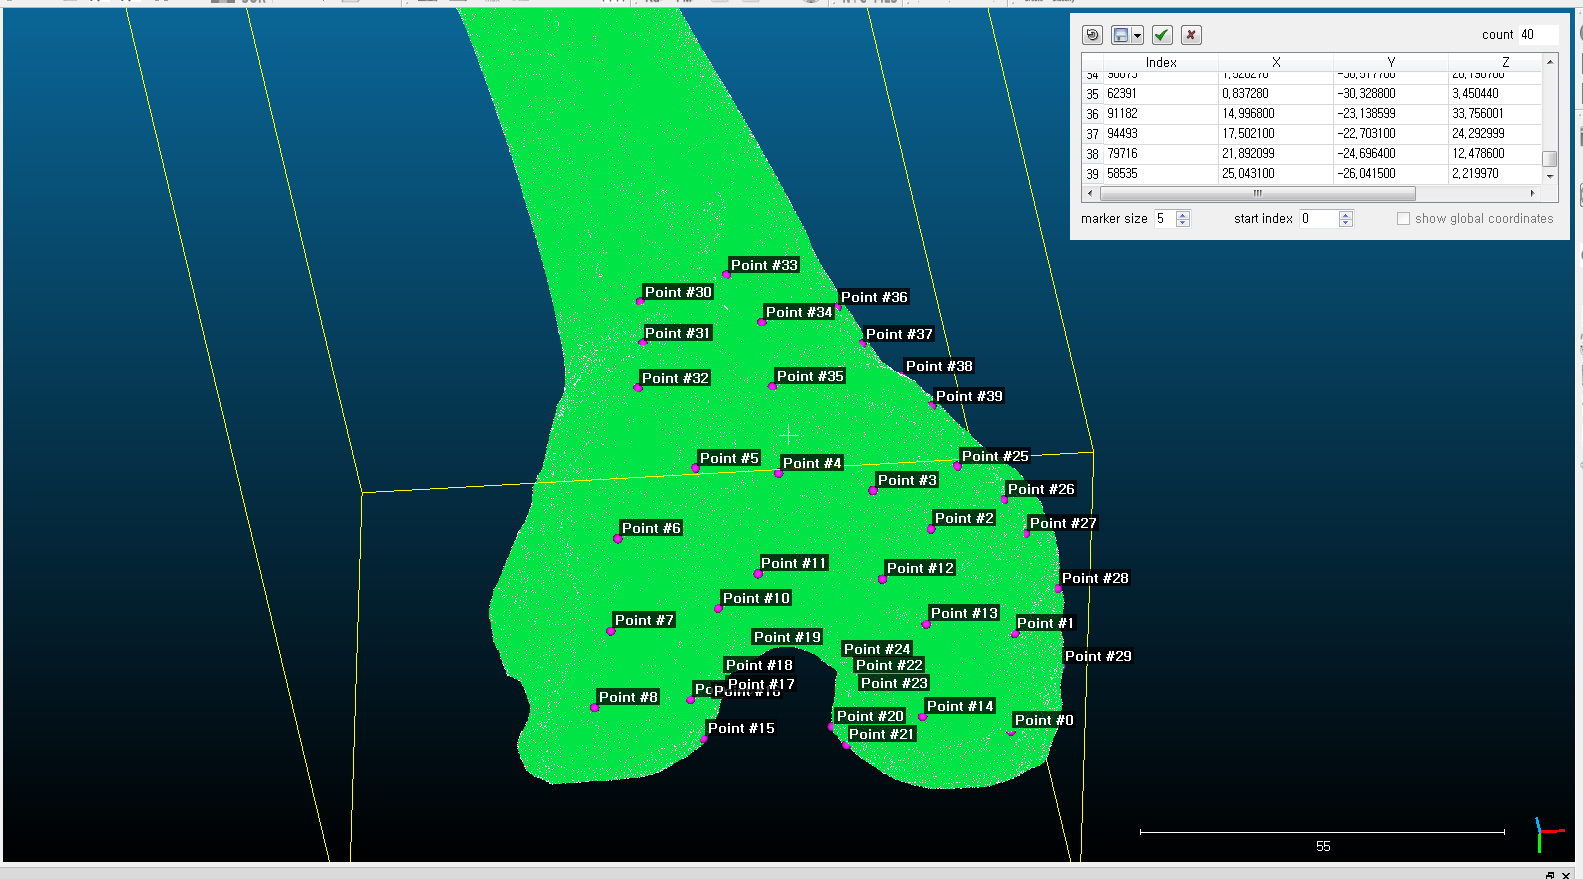

In [180]:
from IPython.display import Image
Image("data/40points/01_picking_point_cloudCompare.png")

In [181]:
points40_selected = []
points40_selected.append(each_point_data[4194 - 3])
points40_selected.append(each_point_data[4667 - 3])
points40_selected.append(each_point_data[16641 - 3])
points40_selected.append(each_point_data[19956 - 3])
points40_selected.append(each_point_data[39717 - 3])
points40_selected.append(each_point_data[30608 - 3])
points40_selected.append(each_point_data[13591 - 3])
points40_selected.append(each_point_data[5863 - 3])
points40_selected.append(each_point_data[6765 - 3])
points40_selected.append(each_point_data[11373 - 3])
points40_selected.append(each_point_data[12339 - 3])
points40_selected.append(each_point_data[16970 - 3])
points40_selected.append(each_point_data[5270 - 3])
points40_selected.append(each_point_data[71 - 3])
points40_selected.append(each_point_data[2192 - 3])
points40_selected.append(each_point_data[33993 - 3])
points40_selected.append(each_point_data[55394 - 3])
points40_selected.append(each_point_data[32582 - 3])
points40_selected.append(each_point_data[51278 - 3])
points40_selected.append(each_point_data[49129 - 3])
points40_selected.append(each_point_data[50348 - 3])
points40_selected.append(each_point_data[35266 - 3])
points40_selected.append(each_point_data[52267 - 3])
points40_selected.append(each_point_data[37748 - 3])
points40_selected.append(each_point_data[45920 - 3])
points40_selected.append(each_point_data[37044 - 3])
points40_selected.append(each_point_data[38491 - 3])
points40_selected.append(each_point_data[40967 - 3])
points40_selected.append(each_point_data[41042 - 3])
points40_selected.append(each_point_data[40076 - 3])
points40_selected.append(each_point_data[94061 - 3])
points40_selected.append(each_point_data[70420 - 3])
points40_selected.append(each_point_data[50672 - 3])
points40_selected.append(each_point_data[91793 - 3])
points40_selected.append(each_point_data[90903 - 3])
points40_selected.append(each_point_data[61733 - 3])
points40_selected.append(each_point_data[90870 - 3])
points40_selected.append(each_point_data[94283 - 3])
points40_selected.append(each_point_data[77387 - 3])
points40_selected.append(each_point_data[58810 - 3])

In [182]:
len(points40_selected)

40

In [183]:
points40_selected

[array([ 34.50924683,  15.37895203, -24.99499512]),
 array([ 34.59237671,  -2.61320496, -25.16351318]),
 array([ 22.08348083, -18.93042755, -19.9163208 ]),
 array([ 13.39041901, -25.34832001, -18.16027832]),
 array([  0.34631348, -23.04792786,  -8.89849854]),
 array([-13.05699158, -27.71556854, -13.07305908]),
 array([-25.7099762 , -21.04079437, -20.92254639]),
 array([-26.77185059,  -6.19965363, -23.7791748 ]),
 array([-28.85319519,   7.7662735 , -23.66088867]),
 array([-14.04784393,   8.35470581, -22.06188965]),
 array([-10.18968201,  -7.67604065, -21.46911621]),
 array([ -3.93756104, -12.23069   , -19.55328369]),
 array([ 14.30276489, -13.27835846, -24.26287842]),
 array([ 20.62446594,  -7.07875061, -27.84747314]),
 array([ 20.66048431,  10.33185577, -27.10668945]),
 array([-10.44971466,  22.24906921, -12.52209473]),
 array([-8.0149231 , 23.28631592, -1.59851074]),
 array([ -7.60518646,  14.0539093 , -13.02648926]),
 array([-6.49769592, 17.2754364 , -3.58258057]),
 array([-2.6169815

###### point를 포함하는 vertex들을 찾고 1개의 vertex 정하기

In [74]:
vertex_group = []

for i in range(len(points40_selected)):
    print(i)
    temp = []
    for j in range(len(vertex_data)):
        if points40_selected[i] in vertex_data[j]:
            temp.append(j)
        if j % 10000 == 0:
            print(j)
    vertex_group.append(temp)

0
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
1
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000

96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
14
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
15
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22

174000
176000
178000
180000
182000
184000
186000
188000
27
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
110000
112000
114000
116000
118000
120000
122000
124000
126000
128000
130000
132000
134000
136000
138000
140000
142000
144000
146000
148000
150000
152000
154000
156000
158000
160000
162000
164000
166000
168000
170000
172000
174000
176000
178000
180000
182000
184000
186000
188000
28
0
2000
4000
6000
8000
10000
12000
14000
16000
18000
20000
22000
24000
26000
28000
30000
32000
34000
36000
38000
40000
42000
44000
46000
48000
50000
52000
54000
56000
58000
60000
62000
64000
66000
68000
70000
72000
74000
76000
78000
80000
82000
84000
86000
88000
90000
92000
94000
96000
98000
100000
102000
104000
106000
108000
1100

In [75]:
vertex_group

[[8082, 8083, 9542, 9561, 12558, 12559, 12628],
 [8972, 8974, 8988, 8989, 8990],
 [32484, 32487, 32490, 32499, 32503, 32504],
 [39169, 39208, 39209, 42107, 42110, 42111, 42120, 42121],
 [78788, 81063, 81108, 81110],
 [60524, 63046, 63050, 63106, 63108, 63109],
 [26423, 26425, 26600, 26676, 26679],
 [11303, 11390, 11497, 11623, 11634, 11799, 14963, 15001],
 [13081, 13099, 13160, 13162, 16160, 16203, 16204, 16246, 16248],
 [22044, 22045, 24914, 24917, 24953],
 [23916, 23919, 24002, 24005, 24006, 27168, 27192],
 [33180, 33209, 33211, 33212, 36528],
 [10164, 10166, 10188, 10189],
 [74, 75, 1477, 1479],
 [4138, 4165, 5456, 5485, 5508, 5510],
 [67296, 67327, 67351, 69972, 69996, 69997],
 [110237, 110248, 112276, 112294, 112295],
 [64458, 64488, 66982, 67012],
 [101962, 101963, 101989, 104031, 104044, 106057],
 [97640, 97644, 97661, 97663, 101740, 101811, 103812, 103834],
 [100103, 100114, 100116, 100117, 104243, 104253],
 [69876, 69878, 69895, 69897, 69900, 72476, 72478],
 [103953, 103954, 1

In [76]:
import random

vertex_selected = []

for i in range(len(vertex_group)):
    randomIndex = random.choice(vertex_group[i])
    vertex_selected.append(randomIndex)

In [77]:
vertex_selected

[9542,
 8990,
 32499,
 42110,
 81110,
 63109,
 26423,
 15001,
 16204,
 22045,
 23919,
 33212,
 10188,
 75,
 5485,
 69972,
 112276,
 64458,
 106057,
 97644,
 104253,
 69900,
 105965,
 89115,
 93432,
 76029,
 78802,
 81263,
 81433,
 91053,
 187588,
 144488,
 102807,
 183442,
 184465,
 122986,
 181587,
 189447,
 154244,
 122948]

###### 선택된 vertex를 포함하는 plane으로 부터 20 mm의 error 추가한 point 만들기

 - 먼저 x, y, z로 각각 11 mm의 error를 추가
 
 - 여기서 11mm는 아래의 식을 바탕으로 3차원 상의 거리가 20 mm이내로 결정할 수 있는 단일 축 값을 선정
 
 - 이후 error가 추가된 point를 plane으로 projection
 
 - ref
 
 > https://ko.khanacademy.org/math/linear-algebra/vectors-and-spaces/dot-cross-products/v/point-distance-to-plane
 >
 > http://www.gisdeveloper.co.kr/?p=839
 >
 > https://codegolf.stackexchange.com/questions/191510/random-point-on-a-sphere

In [262]:
import numpy as np
import math

In [263]:
lgt = 11
a = math.sqrt(lgt*lgt+lgt*lgt)
math.sqrt(lgt*lgt+a*a)

19.05255888325765

In [274]:
def random_vector(length = 1):
    """
    make vector that have length in sphere
    """
    rand_i, rand_j = np.random.rand(2)            # Two independent random numbers from a uniform distribution in the range (0, 1)
    theta          = 2 * np.pi * rand_i           # Spherical coordinate theta
    phi            = np.arccos(2 * rand_j - 1)    # Spherical coordinate phi, corrected for distribution bias
    x              = np.cos(theta) * np.sin(phi)  # Cartesian coordinate x
    y              = np.sin(theta) * np.sin(phi)  # Cartesian coordinate y
    z              = np.cos(phi)                  # Cartesian coordinate z
    vector         = [x*math.sqrt(length), y*math.sqrt(length), z*math.sqrt(length)]
    return vector

def add_mm_error_to_point(point, error = 20):
    """
    input data structure
    point = [x, y, z] # x, y, z unit = mm
    
    output data structure
    point_added_error = [x', y', z']
    """
    
    point_added_error = point.copy()
    
    xyz_error = random_vector(error)

    point_added_error[0] += xyz_error[0]
    point_added_error[1] += xyz_error[1]
    point_added_error[2] += xyz_error[2]
    
    return point_added_error

def find_projecttion_point_in_plane_3D(point, plane, norm_vect):
    """
    input data structure
    point = [x, y, z]
    plane = [a, b, c, d] # plane eq. = ax + by + cz + d = 0
    norm_vect = [i, j, k]
    
    output data structure
    True -> projected_point = [x', y', z']
    False -> value of diff. with plane = float(d)
    """
    
    plane_ABC_sqrt = math.sqrt(plane[0]*plane[0] + plane[1]*plane[1] + plane[2]*plane[2])
    dist = (plane[3] + plane[0] * point[0] + plane[1] * point[1] + plane[2] * point[2]) / plane_ABC_sqrt
    projected_point = point - dist * norm_vect
    
    on_the_plane_value = plane[3] + plane[0] * projected_point[0] + plane[1] * projected_point[1] + plane[2] * projected_point[2]
    
    if 0.000001 > on_the_plane_value:
        return projected_point
    else:
        return on_the_plane_value

In [275]:
points40_with_error_on_plane = []

data_point_40_slt = points40_selected.copy()

for i in range(len(data_point_40_slt)):
    _point_added_error = add_mm_error_to_point(data_point_40_slt[i])
    _point_on_plane = find_projecttion_point_in_plane_3D(_point_added_error, 
                                                         plane_data[vertex_selected[i]],
                                                         vector_data[vertex_selected[i]])
    if(type(_point_on_plane) == type(np.array([0]))):
        points40_with_error_on_plane.append(_point_on_plane)
    else:
        print(_point_on_plane)

In [276]:
points40_with_error_on_plane

[array([ 37.59985482,  12.75474116, -29.0178709 ]),
 array([ 41.63192054,   2.8529771 , -18.80521822]),
 array([ 28.80641814, -21.1460102 , -15.3115763 ]),
 array([  8.41156148, -20.12574926, -20.42542602]),
 array([ -4.82599602, -26.60036874,  -4.50347008]),
 array([-10.86567345, -21.28359635, -17.76160818]),
 array([-22.29818489, -18.13313879, -25.33620494]),
 array([-20.23557622,   1.77242783, -24.57241723]),
 array([-25.02300755,  11.94548227, -24.60286859]),
 array([-14.14536058,  17.39282611, -20.99876814]),
 array([  3.23187667,   2.30824507, -16.58496744]),
 array([  4.36806936, -11.79058853, -18.17193748]),
 array([  7.0211106 , -16.03444671, -22.31293056]),
 array([ 10.27516015,  -9.38987849, -28.87342844]),
 array([ 19.45044227,  20.67828178, -24.40482834]),
 array([-13.53607159,  23.69602899, -15.78875055]),
 array([-9.98973811, 28.54444818, -1.47980106]),
 array([ -5.83939806,   8.26517963, -11.52648337]),
 array([ 1.72601757,  4.90228713, -7.96983137]),
 array([ -8.689116

In [277]:
data_point_40_slt

[array([ 34.50924683,  15.37895203, -24.99499512]),
 array([ 34.59237671,  -2.61320496, -25.16351318]),
 array([ 22.08348083, -18.93042755, -19.9163208 ]),
 array([ 13.39041901, -25.34832001, -18.16027832]),
 array([  0.34631348, -23.04792786,  -8.89849854]),
 array([-13.05699158, -27.71556854, -13.07305908]),
 array([-25.7099762 , -21.04079437, -20.92254639]),
 array([-26.77185059,  -6.19965363, -23.7791748 ]),
 array([-28.85319519,   7.7662735 , -23.66088867]),
 array([-14.04784393,   8.35470581, -22.06188965]),
 array([-10.18968201,  -7.67604065, -21.46911621]),
 array([ -3.93756104, -12.23069   , -19.55328369]),
 array([ 14.30276489, -13.27835846, -24.26287842]),
 array([ 20.62446594,  -7.07875061, -27.84747314]),
 array([ 20.66048431,  10.33185577, -27.10668945]),
 array([-10.44971466,  22.24906921, -12.52209473]),
 array([-8.0149231 , 23.28631592, -1.59851074]),
 array([ -7.60518646,  14.0539093 , -13.02648926]),
 array([-6.49769592, 17.2754364 , -3.58258057]),
 array([-2.6169815

 - error가 추가된 point와 기존의 point를 scatter plot in 3D

In [278]:
%matplotlib notebook

import pandas as pd

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


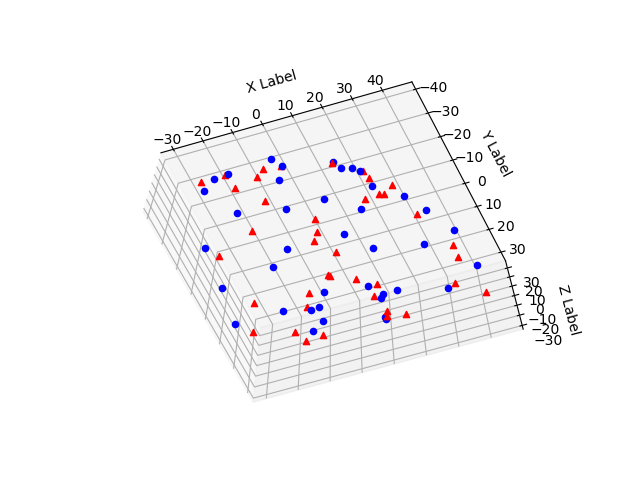

In [279]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(data_point_40_slt)):
    xs = data_point_40_slt[i][0]
    ys = data_point_40_slt[i][1]
    zs = data_point_40_slt[i][2]
    ax.scatter(xs, ys, zs, c='blue', marker='o')

for i in range(len(points40_with_error_on_plane)):
    xs = points40_with_error_on_plane[i][0]
    ys = points40_with_error_on_plane[i][1]
    zs = points40_with_error_on_plane[i][2]
    ax.scatter(xs, ys, zs, c='red', marker='^')
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [280]:
import numpy as np

np.save('data/points40_with_error_on_plane', points40_with_error_on_plane)
np.save('data/data_point_40_slt', data_point_40_slt)